In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("socailmedia Sage.csv")

In [4]:
data.head()

,Post_id,Platform,Date,Time,Hashtags,Topic,Likes,Comments,Shares,Impressions,Ctr_Percent,Sentiment
0,Sage_0001,Instagram,09-11-2024,19:51,No Hashtags,Research,566,123,23,18799,3.40,Positive
1,Sage_0002,LinkedIn,16-02-2025,20:42,No Hashtags,Research,294,30,70,6441,2.22,Positive
2,Sage_0003,LinkedIn,19-09-2025,03:25,#Research #Alumni #Career,Education,246,68,47,5534,4.60,Negative
3,Sage_0004,Twitter,01-06-2025,00:04,#Recruitment,Announcements,113,42,139,3802,2.15,Positive
4,Sage_0005,LinkedIn,16-04-2025,17:04,#Education #Alumni #Recruitment,Announcements,640,92,10,13421,1.29,Neutral


In [5]:
data.isnull().sum()

Post_id        0
Platform       0
Date           0
Time           0
Hashtags       0
Topic          0
Likes          0
Comments       0
Shares         0
Impressions    0
Ctr_Percent    0
Sentiment      0
dtype: int64

In [6]:
data.fillna("No Tags", inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Post_id      250 non-null    object 
 1   Platform     250 non-null    object 
 2   Date         250 non-null    object 
 3   Time         250 non-null    object 
 4   Hashtags     250 non-null    object 
 5   Topic        250 non-null    object 
 6   Likes        250 non-null    int64  
 7   Comments     250 non-null    int64  
 8   Shares       250 non-null    int64  
 9   Impressions  250 non-null    int64  
 10  Ctr_Percent  250 non-null    float64
 11  Sentiment    250 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.6+ KB


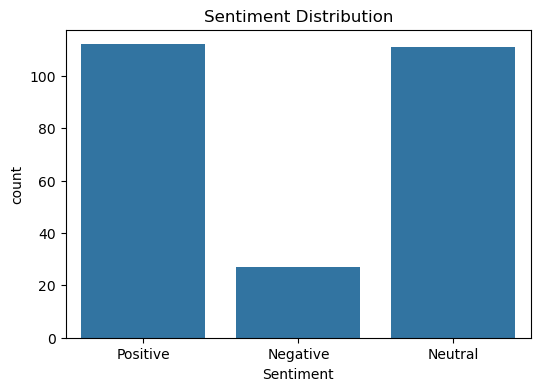

In [8]:
# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

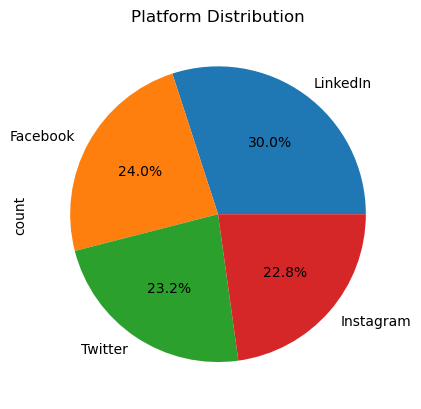

In [13]:
# Plateform Distribution
if 'Platform' in data.columns:
    data['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Platform Distribution')
    plt.show()

In [16]:
# For unique values
data.describe()
data.nunique()

Post_id        250
Platform         4
Date           188
Time           229
Hashtags       123
Topic            7
Likes          225
Comments       134
Shares         121
Impressions    249
Ctr_Percent    193
Sentiment        3
dtype: int64

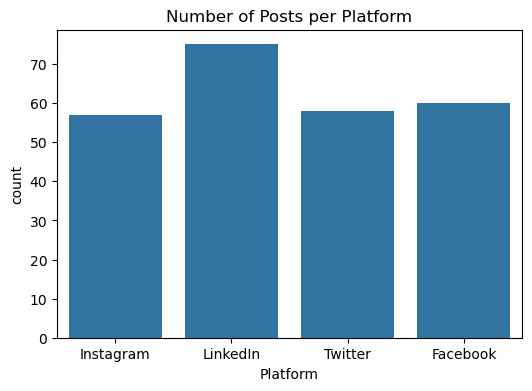

In [17]:
# Number of Posts per Platform
plt.figure(figsize=(6,4))
sns.countplot(x='Platform', data=data)
plt.title("Number of Posts per Platform")
plt.show()

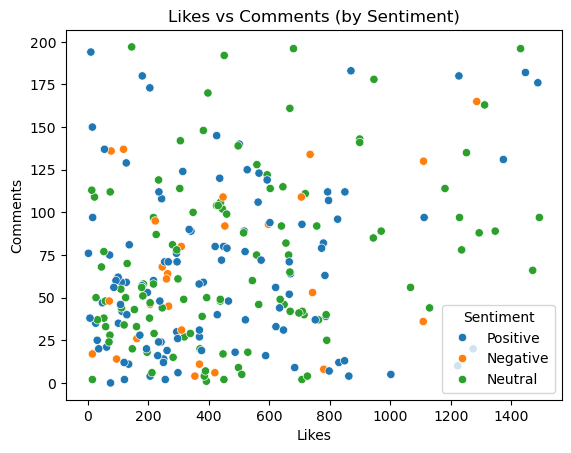

In [18]:
# Engagement Analysis
sns.scatterplot(x='Likes', y='Comments', hue='Sentiment', data=data)
plt.title("Likes vs Comments (by Sentiment)")
plt.show()

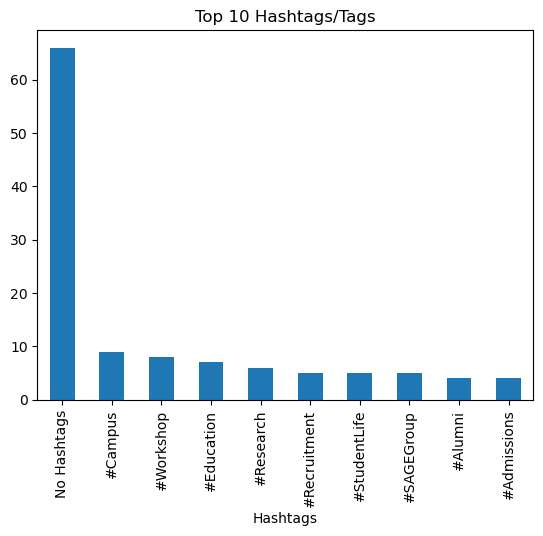

In [19]:
# Top Hashtags or Tags
data['Hashtags'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Hashtags/Tags")
plt.show()

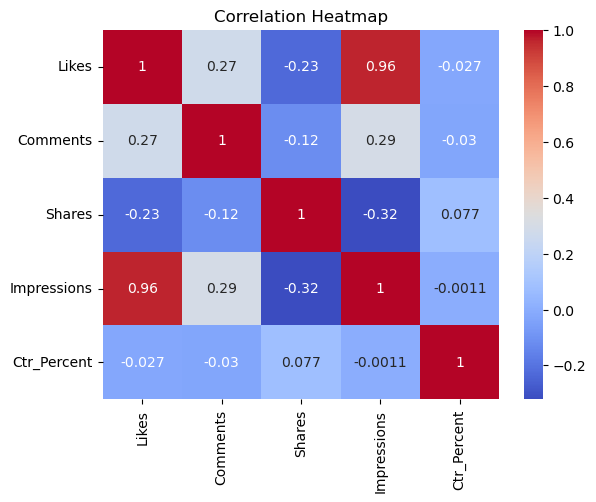

In [20]:
# Correlation Check
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

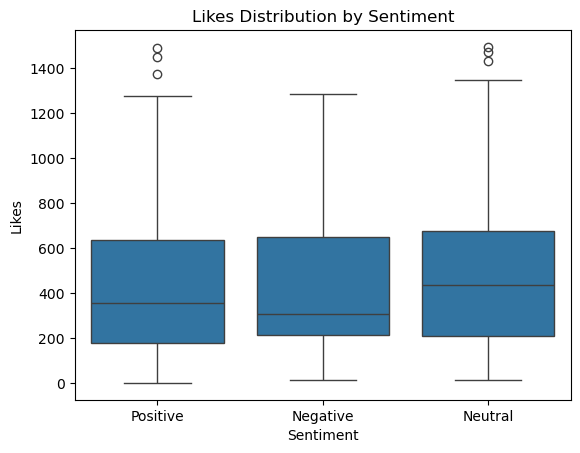

In [21]:
# Likes Distribution by Sentiment
sns.boxplot(x='Sentiment', y='Likes', data=data)
plt.title("Likes Distribution by Sentiment")
plt.show()

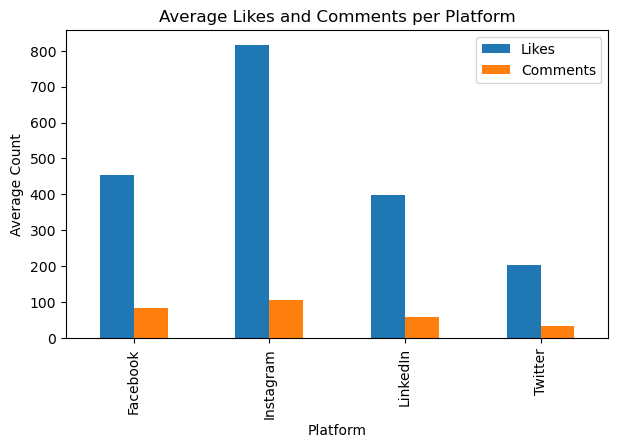

In [22]:
# Average Likes and Comments per Platform
avg_eng = data.groupby('Platform')[['Likes','Comments']].mean()
avg_eng.plot(kind='bar', figsize=(7,4))
plt.title("Average Likes and Comments per Platform")
plt.ylabel("Average Count")
plt.show()

In [23]:
# Likes Prediction (Regression Model)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Encode categorical columns
le = LabelEncoder()
data['Sentiment_encoded'] = le.fit_transform(data['Sentiment'])
data['Platform_encoded'] = le.fit_transform(data['Platform'])

# Select features (inputs) and target (output)
X = data[['Comments', 'Sentiment_encoded', 'Platform_encoded']]
y = data['Likes']

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Predict likes
y_pred_reg = model_reg.predict(X_test)

# Evaluate
print("📊 Likes Prediction Results:")
print("R² Score:", r2_score(y_test, y_pred_reg))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_reg))

# Add predictions back to data (optional)
data['Predicted_Likes'] = model_reg.predict(X)


📊 Likes Prediction Results:
R² Score: 0.03640568349081219
Mean Absolute Error: 257.02858819873546



📊 Sentiment Prediction Results:
Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.55      0.55      0.55        22
           2       0.52      0.58      0.55        24

    accuracy                           0.52        50
   macro avg       0.35      0.38      0.36        50
weighted avg       0.49      0.52      0.50        50



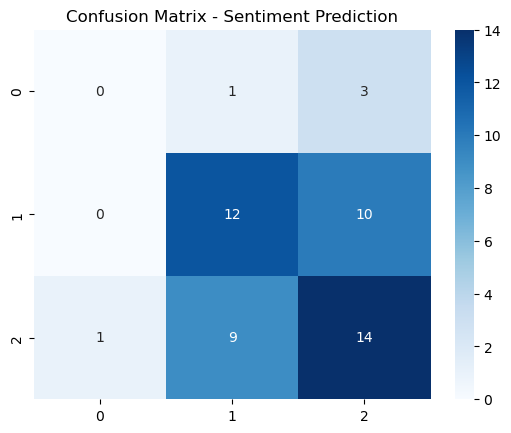

In [24]:
# Sentiment Prediction (Classification Model)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode platform (already encoded above)
X = data[['Likes', 'Comments', 'Platform_encoded']]
y = data['Sentiment_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classification model
model_cls = RandomForestClassifier(random_state=42)
model_cls.fit(X_train, y_train)

# Predictions
y_pred_cls = model_cls.predict(X_test)

# Evaluate
print("\n📊 Sentiment Prediction Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cls))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_cls), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Sentiment Prediction")
plt.show()

# Add predictions to data
data['Predicted_Sentiment'] = model_cls.predict(X)


In [25]:
# To save the final file
data.to_csv("final_social_data_with_predictions.csv", index=False)

In [26]:
# to check the save file columns
data[['Likes', 'Predicted_Likes', 'Sentiment', 'Predicted_Sentiment']].head()

,Likes,Predicted_Likes,Sentiment,Predicted_Sentiment
0,566,572.725095,Positive,2
1,294,366.192619,Positive,2
2,246,465.779478,Negative,0
3,113,281.657685,Positive,2
4,640,465.946946,Neutral,1


In [27]:
# To rename the final file
data.to_csv("final_social_media_with_predictions.csv", index=False)

In [28]:
# To check the save file
import os
os.listdir()

['.ipynb_checkpoints',
 '01-NumPy Arrays.ipynb',
 '02-Numpy Indexing and Selection.ipynb',
 '03-Numpy Operations.ipynb',
 '04-Numpy Exercises.ipynb',
 '05-Numpy Exercises - Solutions.ipynb',
 '06- Pandas Series.ipynb',
 '07- Pandas DataFrames.ipynb',
 '08-Pandas Missing Data.ipynb',
 '09-Pandas Merging, Joining, and Concatenating .ipynb',
 '10- Pandas Operations .ipynb',
 '11-Pandas Data Input and Output .ipynb',
 '12-Matplotlib Concepts Lecture.ipynb',
 '13 - Matplotlib Exercises.ipynb',
 '14 - Matplotlib Exercises - Solutions.ipynb',
 '15 - Seaborn practice.ipynb',
 '911 call data capstone.csv',
 '911 Calls Data Capstone Project.ipynb',
 'Analysis Performed.xlsx',
 'Analysis+-+lectures.xlsx',
 'anime project.ipynb',
 'anime.csv',
 'basic.ipynb',
 'carprice solu.ipynb',
 'CarPrice_Assignment.csv',
 'cleaned_social_data_fixed.csv',
 'Countries.csv',
 'countriesproject 2 ques.ipynb',
 'Cross Validation.pptx',
 'Customer churn.ipynb',
 'Data_Filtering (1) by brajesh.ipynb',
 'DAVA.ipynb'